# Семинар 4. Логистическая регрессия

## Логистическая регрессия

Модель логистической регрессии:
$$
\hat y = \sigma (Xw).
$$
Сигмоида меняется в пределах от 0 до 1 и имеет вид:
$$
\sigma(x) = \frac{1}{1+e^{-x}}.
$$

Функция потерь log-loss:
$$
L = -\frac{1}{\ell}\sum_{i = 1}^{\ell}(y_i\log(\hat y_i) + (1 - y_i)\log(1 - \hat y_i)),
$$
где $\ell$ - количество объектов.


Регуляризация вводится таким же образом, как это было в случае линейной регрессии. Например, функция потерь для $L$-$2$ регуляризации выглядит так:

$$
\bar{L}(X, w) = L(X, w) + \frac{1}{2}\lambda\|w\|^2_2.
$$

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Практика

Рассмотрим свойства логистической регрессии на примере классического набора данных ["Ирисы Фишера"](https://ru.wikipedia.org/wiki/Ирисы_Фишера). Этот набор состоит из 150 наблюдений, каждое из которых представляет собой четыре измерения: длина наружной доли околоцветника (`sepal length`), ширина наружной доли околоцветника (`sepal width`), длина внутренней доли околоцветника (`petal length`), ширина внутренней доли околоцветника (`petal width`). Каждое наблюдение относится к одному из трёх классов ириса: `setosa`, `versicolor` или `virginica`. Задача состоит в том, чтобы по измерениям предсказать класс цветка.

[<img src="https://www.embedded-robotics.com/wp-content/uploads/2022/01/Iris-Dataset-Classification.png" alt="drawing" width="800"/>](https://www.embedded-robotics.com/wp-content/uploads/2022/01/Iris-Dataset-Classification.png)

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)

data = iris['data']
y = iris['target'].values

In [ ]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y[:5]

array([0, 0, 0, 0, 0])

### Задание 1.

Перейдём к задаче бинарной классификации: будем предсказывать принадлежность цветка к виду `versicolor` против принадлежности ко всем прочим видам. Перекодируйте зависимую переменную так, чтобы цветки вида `versicolor` (y=1) имели метку 1, а прочих видов – метку 0.

In [ ]:
y[y!=1] = 0 # YOUR CODE HERE

### Задание 2.

Будем работать с двумя признаками: `sepal length (cm)` и `sepal width (cm)`. Построим диаграмму рассеяния по тренировочной выборке и убедитесь, что данные линейно не разделимы.

In [ ]:
# YOUR CODE HERE
x_cols = ['sepal length (cm)', 'sepal width (cm)']
X = data[x_cols].values

In [ ]:
from sklearn.model_selection import train_test_split

# делим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

Приведем значения всех входных признаков к одному масштабу. Для этого применим функцию `StandardScaler`. Это преобразование приводит значения каждого признака к нулевому среднему и единичной дисперсии:

$$
X_{new} = \frac{X - \mu}{\sigma}
$$

где, $\mu$ - среднее значение признака

$\sigma$ - стандартное отклонение значений признака

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train, y_train) # считаем \mu и \sigma

# делаем преобразование данных
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

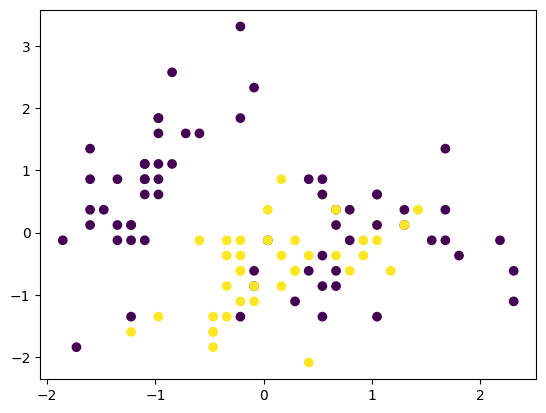

In [ ]:
plt.scatter(X_train_ss[:, 0], X_train_ss[:, 1], c=y_train)
plt.show()

### Задание 3.

Сравним качество для KNN и логрега.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
logreg = LogisticRegression()

#### Обучение

In [ ]:
# обучите классификаторы

# YOUR CODE HERE
knn.fit(X_train_ss, y_train)
logreg.fit(X_train_ss, y_train)

LogisticRegression()

#### Прогноз метки класса

In [ ]:
# получите прогнозы для тестовой выборки

y_test_pred_knn = knn.predict(X_test_ss) # YOUR CODE HERE
y_test_pred_logreg = logreg.predict(X_test_ss) # YOUR CODE HERE

In [ ]:
y_test_pred_knn[:5], y_test_pred_logreg[:5]

(array([0, 1, 0, 1, 0]), array([1, 0, 1, 0, 0]))

#### Прогноз вероятности класса

In [ ]:
y_test_proba_knn = knn.predict_proba(X_test_ss)
y_test_proba_logreg = logreg.predict_proba(X_test_ss)

In [ ]:
y_test_proba_knn[:5]

array([[1. , 0. ],
       [0.2, 0.8],
       [0.6, 0.4],
       [0. , 1. ],
       [1. , 0. ]])

In [ ]:
y_test_proba_logreg[:5]

array([[0.29417961, 0.70582039],
       [0.57205493, 0.42794507],
       [0.46752787, 0.53247213],
       [0.63769064, 0.36230936],
       [0.90567108, 0.09432892]])

#### Метрика качества

In [ ]:
from sklearn.metrics import accuracy_score
print(f'KNN: {accuracy_score(y_test, y_test_pred_knn)}')
print(f'LogReg: {accuracy_score(y_test, y_test_pred_logreg)}')

KNN: 0.7555555555555555
LogReg: 0.8444444444444444


#### Строим разделяющую поверность

In [ ]:
#!pip install mlxtend

Text(0.5, 1.0, 'Разделяющая поверхность для KNN')

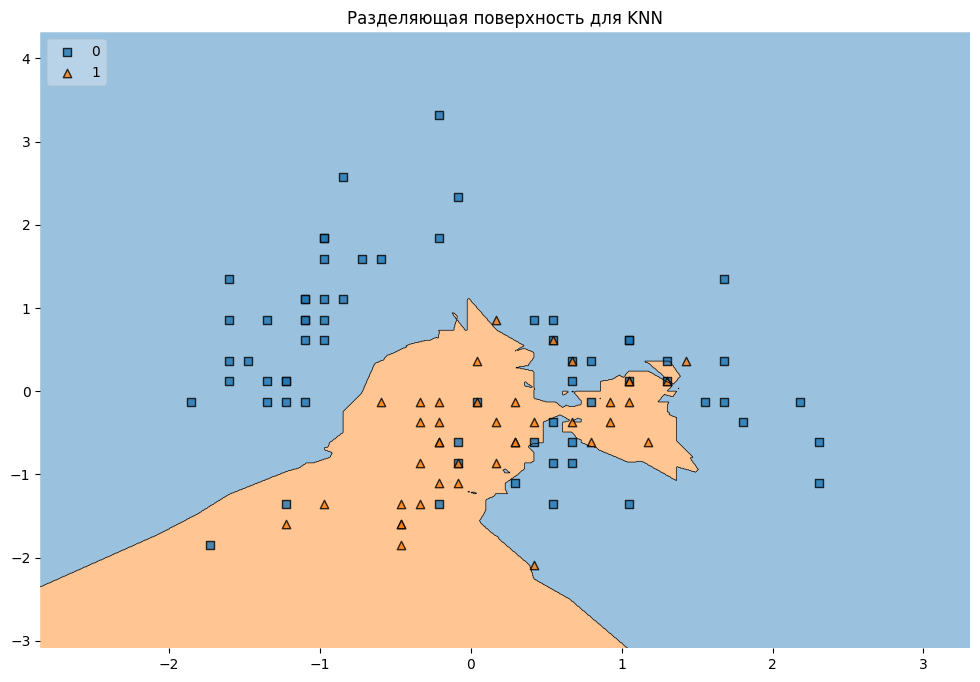

In [ ]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(12,8))
plot_decision_regions(X_train_ss, y_train, clf=knn, legend=2)
plt.title('Разделяющая поверхность для KNN')

Text(0.5, 1.0, 'Разделяющая поверхность для логрега')

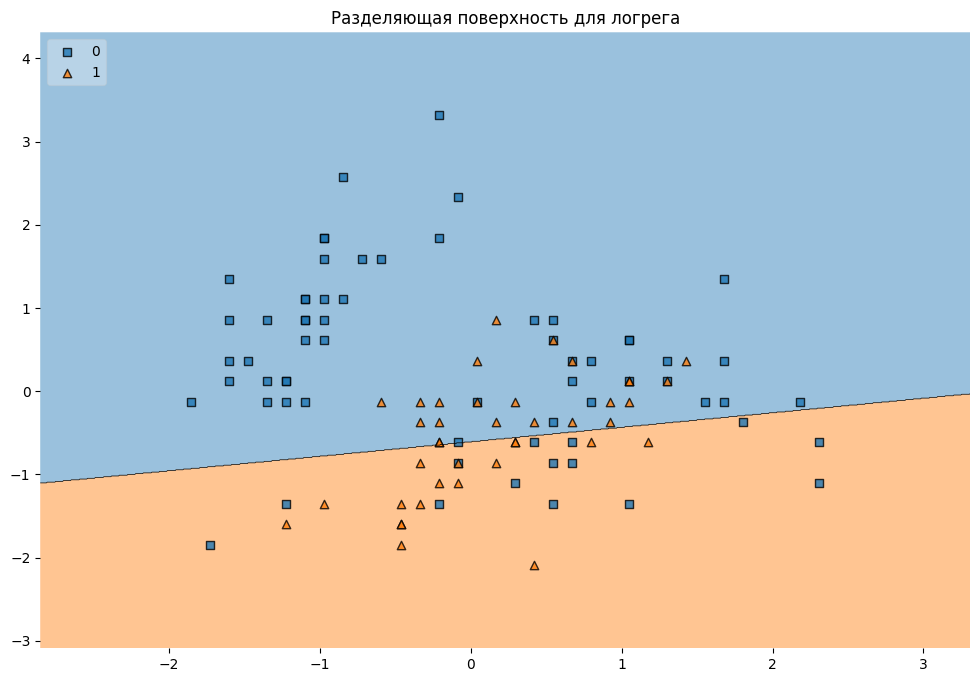

In [ ]:
plt.figure(figsize=(12,8))
plot_decision_regions(X_train_ss, y_train, clf=logreg, legend=2)
plt.title('Разделяющая поверхность для логрега')

Теперь изучим свойства каждого классификатора по-отдельности. Начнём с логистической регрессии.

### Задание 4.

Обучите три различные логистические регрессии с разным параметром регуляризации $C$.

In [ ]:
# YOUR CODE HERE

logreg_1 = LogisticRegression(C=0.01) # C=0.01
logreg_2 = LogisticRegression(C=0.05) # C=0.05
logreg_3 = LogisticRegression(C=10) # C=10

Acc., C=0.01:  0.7777777777777778
Acc., C=0.05:  0.8444444444444444
Acc., C=10:  0.8444444444444444


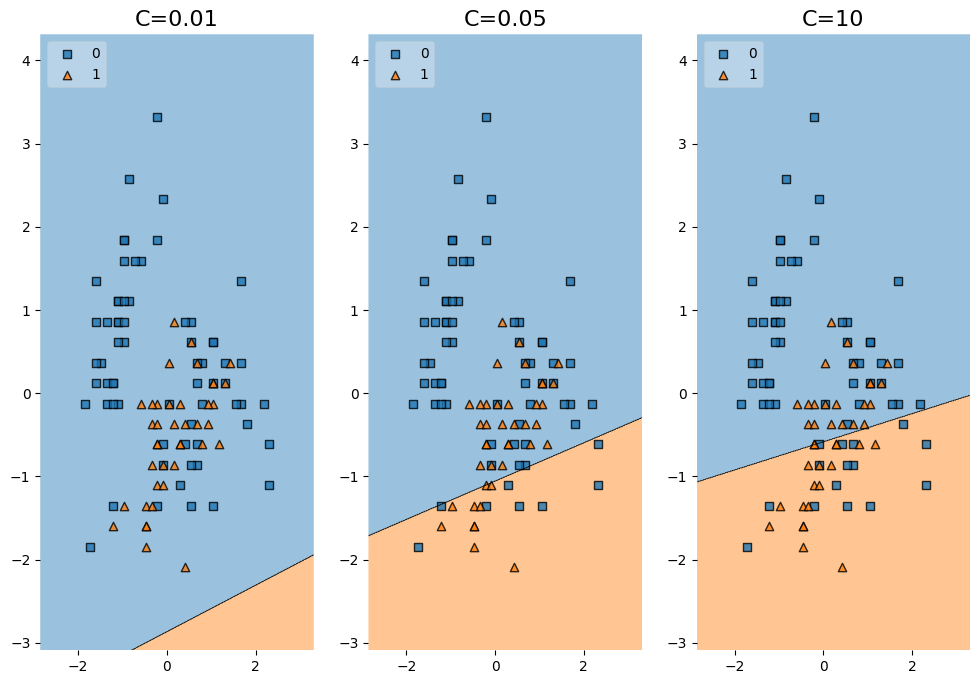

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 8))
pipes = [logreg_1, logreg_2, logreg_3]


for ind, clf in enumerate(pipes):
    clf.fit(X_train_ss, y_train)
    y_test_pred = clf.predict(X_test_ss)
    score = accuracy_score(y_test, y_test_pred)
    print(f"Acc., C={clf.get_params()['C']}: ", score)
    fig = plot_decision_regions(X_train_ss, y_train, clf=clf, legend=2, ax=axes[ind])
    fig.set_title(f"C={clf.get_params()['C']}", fontsize=16)


Перейдём к KNN.

### Задание 5.

Обучите три KNN с разным числом соседей.

In [ ]:
# YOUR CODE HERE

knn_1 = KNeighborsClassifier(n_neighbors=1) # n_neighbors=1
knn_2 = KNeighborsClassifier(n_neighbors=5) # n_neighbors=5
knn_3 = KNeighborsClassifier(n_neighbors=50) # n_neighbors=50

Acc., n_neighbors=1:  0.8222222222222222
Acc., n_neighbors=5:  0.7555555555555555
Acc., n_neighbors=50:  0.8444444444444444


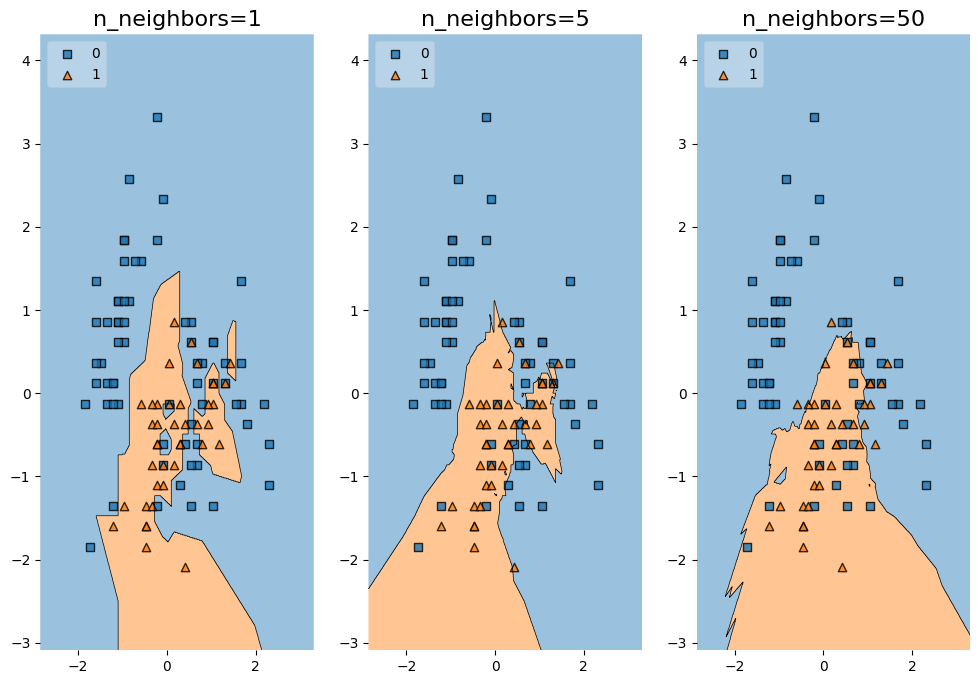

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 8))
pipes = [knn_1, knn_2, knn_3]


for ind, clf in enumerate(pipes):
    clf.fit(X_train_ss, y_train)
    y_test_pred = clf.predict(X_test_ss)
    score = accuracy_score(y_test, y_test_pred)
    print(f"Acc., n_neighbors={clf.get_params()['n_neighbors']}: ", score)
    fig = plot_decision_regions(X_train_ss, y_train, clf=clf, legend=2, ax=axes[ind])
    fig.set_title(f"n_neighbors={clf.get_params()['n_neighbors']}", fontsize=16)

#### Дополнительное задание
Зачем мы используем `StandardScaler`? Что будет, если один из входных признаков умножить на 10^6?

## Нелинейные поверхности

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=200, shuffle=True, noise = 0.1, factor=0.1)

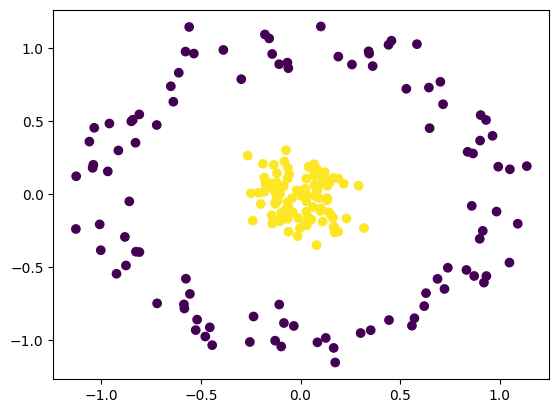

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y);

In [ ]:
# делим данные на обучение и тест
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
# обучаем модель
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

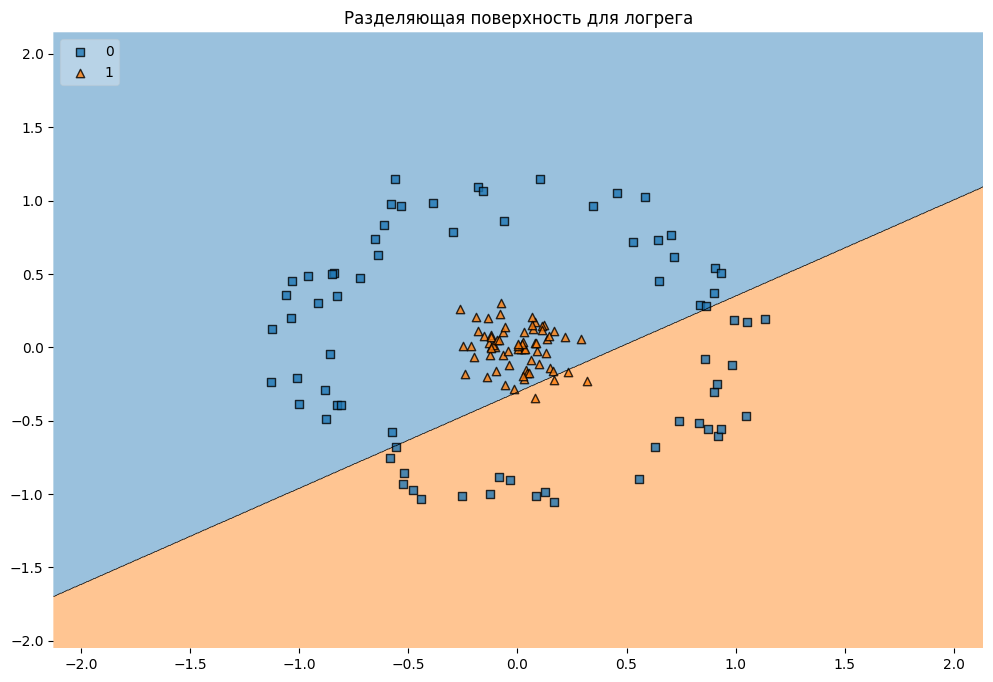

In [ ]:
plt.figure(figsize=(12,8))
plot_decision_regions(X_train, y_train, clf=logreg, legend=2)
plt.title('Разделяющая поверхность для логрега');

### Создадим новый признак

$$
X_3 = X_1^{2} + X_2^{2}
$$

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# сделаем свой transformer (как StandardScaler)
class DistanceTransformer(TransformerMixin, BaseEstimator):

  # fit ничего не делает
  def fit(self, X, y=None):
    return self

  # transform получает новый признак
  def transform(self, X):
    return (X[:,0] ** 2 + X[:,1] ** 2).reshape(-1, 1)

In [ ]:
from sklearn.pipeline import make_pipeline

# сложим все шаги в пайплайн
pipe = make_pipeline(DistanceTransformer(),
                     LogisticRegression())
pipe.fit(X_train, y_train)

Pipeline(steps=[('distancetransformer', DistanceTransformer()),
                ('logisticregression', LogisticRegression())])

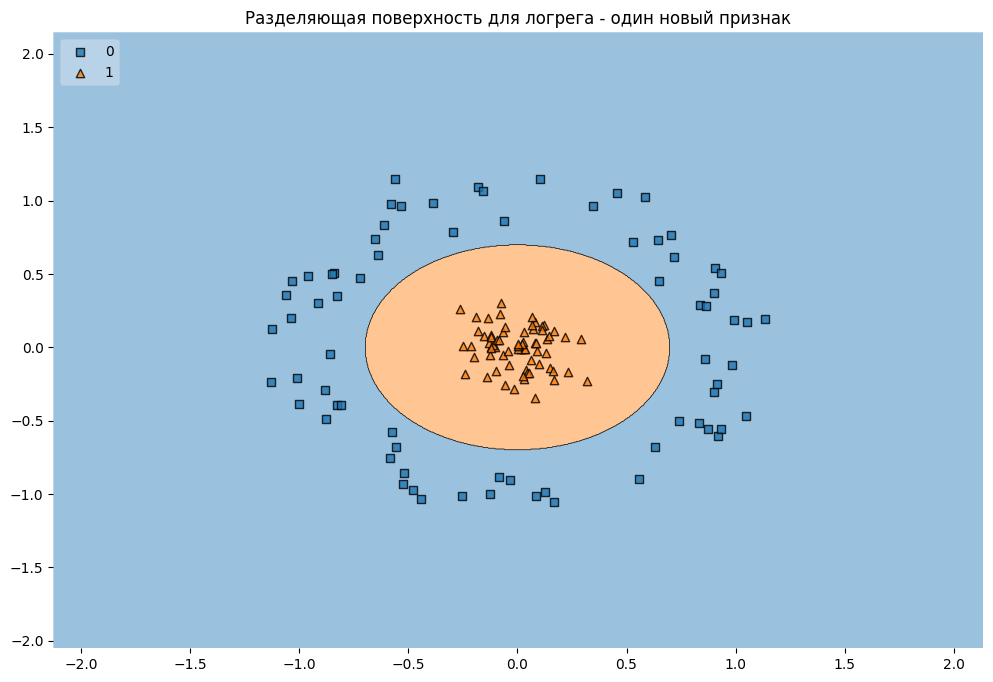

In [ ]:
plt.figure(figsize=(12,8))
plot_decision_regions(X_train, y_train, clf=pipe, legend=2)
plt.title('Разделяющая поверхность для логрега - один новый признак');